# Timeseries Forecasting of Crude Oil Prices

In [1]:
import pandas as pd
from datetime import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from warnings import filterwarnings

filterwarnings('ignore')

# Load data
df = pd.read_csv('wti-prices.csv', parse_dates=True, index_col='Day')

# # Add missing dates
# idx = pd.date_range(df.index.min(), df.index.max(), freq='D')
# df = df.reindex(idx)

# # Use previous prices for missing values
# df = df.interpolate(method='pad', limit=df.size)

In [2]:
df.head()

,Price
Day,
2021-06-28,72.98
2021-06-25,74.21
2021-06-24,73.31
2021-06-23,73.11
2021-06-22,73.15


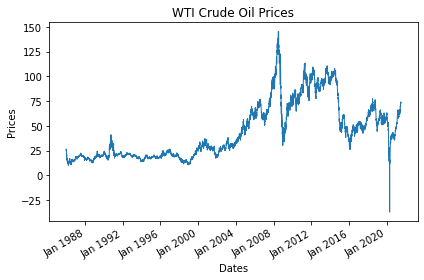

In [3]:
# plt.style.use('fivethirtyeight')
# plt.xkcd()

plt.plot_date(df.index, df.Price, linestyle='solid', linewidth=1, marker='')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('WTI Crude Oil Prices')

plt.tight_layout()
plt.savefig('price_plot.png')
plt.show()

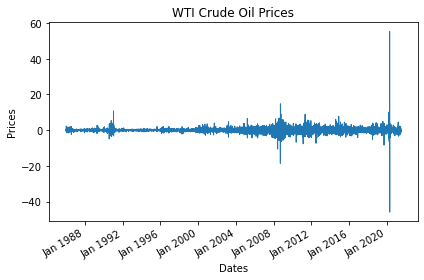

In [4]:
df_diff = df.diff(periods=1)[1:]

plt.plot_date(df_diff.index, df_diff.Price, linestyle='solid', linewidth=1, marker='')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('WTI Crude Oil Prices')

plt.tight_layout()
plt.savefig('price_diff_plot.png')
plt.show()

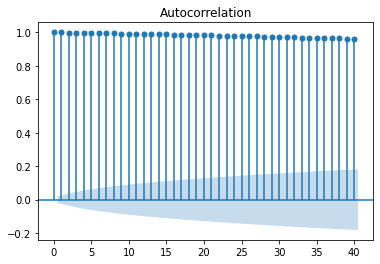

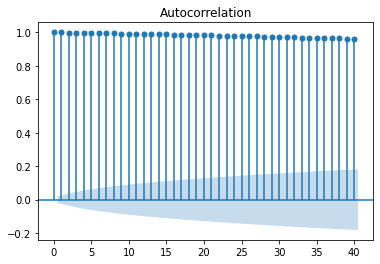

In [5]:
plot_acf(df)

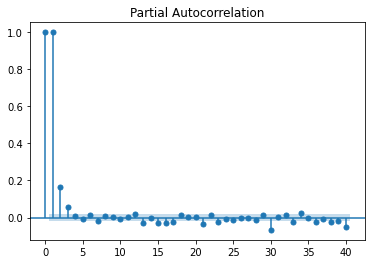

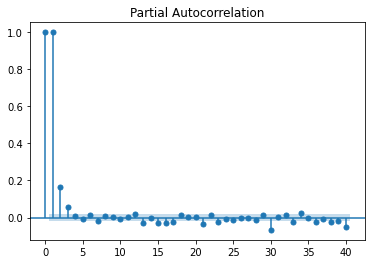

In [6]:
plot_pacf(df)

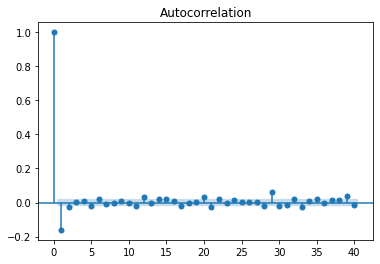

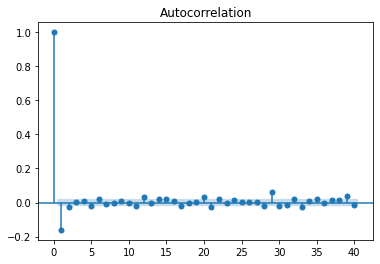

In [7]:
plot_acf(df_diff)

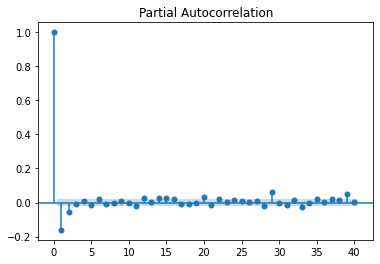

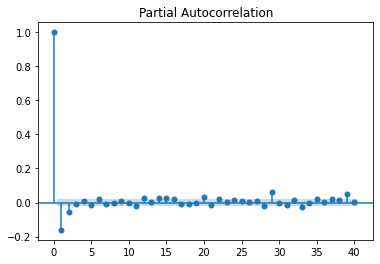

In [8]:
plot_pacf(df_diff)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

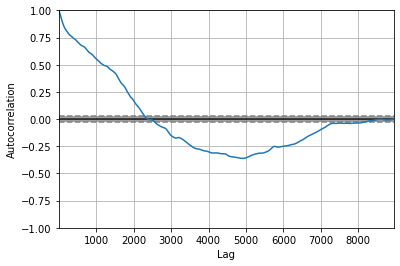

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)

In [10]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [11]:
history

[array([72.98]),
 array([74.21]),
 array([73.31]),
 array([73.11]),
 array([73.15]),
 array([73.64]),
 array([71.64]),
 array([71.06]),
 array([72.03]),
 array([72.06]),
 array([70.94]),
 array([71.]),
 array([70.34]),
 array([69.9]),
 array([70.11]),
 array([69.21]),
 array([69.57]),
 array([68.81]),
 array([68.79]),
 array([67.8]),
 array([66.31]),
 array([66.87]),
 array([66.41]),
 array([66.27]),
 array([66.13]),
 array([63.61]),
 array([61.95]),
 array([63.28]),
 array([65.49]),
 array([66.24]),
 array([65.32]),
 array([63.82]),
 array([65.96]),
 array([65.31]),
 array([64.92]),
 array([64.96]),
 array([64.73]),
 array([65.63]),
 array([65.72]),
 array([64.46]),
 array([63.5]),
 array([65.]),
 array([63.81]),
 array([63.03]),
 array([62.02]),
 array([62.18]),
 array([61.45]),
 array([61.34]),
 array([62.61]),
 array([63.33]),
 array([63.16]),
 array([63.42]),
 array([63.15]),
 array([60.2]),
 array([59.7]),
 array([59.29]),
 array([59.61]),
 array([59.77]),
 array([59.34]),
 array

In [12]:
# walk-forward validation
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(full_output=0, disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=18.296018, expected=18.460000
predicted=18.420461, expected=18.510000
predicted=18.490736, expected=18.220000
predicted=18.258093, expected=18.190000
predicted=18.184185, expected=18.180000
predicted=18.170808, expected=18.210000
predicted=18.194061, expected=18.180000
predicted=18.174189, expected=18.150000
predicted=18.144184, expected=18.790000
predicted=18.671177, expected=18.860000
predicted=18.837443, expected=18.720000
predicted=18.732876, expected=18.490000
predicted=18.518029, expected=18.810000
predicted=18.745225, expected=18.670000
predicted=18.682872, expected=18.760000
predicted=18.734055, expected=19.130000
predicted=19.056851, expected=19.350000
predicted=19.302226, expected=19.410000
predicted=19.389255, expected=19.760000
predicted=19.690361, expected=19.170000
predicted=19.258967, expected=19.820000
predicted=19.699703, expected=20.010000
predicted=19.967427, expected=20.290000
predicted=20.232288, expected=21.010000
predicted=20.878143, expected=20.760000


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.555


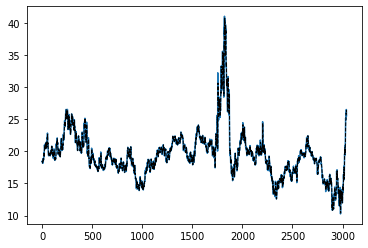

In [25]:
plt.plot(test)
plt.plot(predictions, color='k', linestyle='--', linewidth=1)
plt.show()

In [19]:
test.max()

41.07